In [1]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
import openpyxl
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
import plotly.graph_objects as go
from imblearn.combine import SMOTETomek
from eli5.sklearn import PermutationImportance
import eli5
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import warnings
import sys
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import rcParams
import scipy

warnings.filterwarnings(action='ignore')
%matplotlib inline

데이터 로드 & 전처리

In [2]:
df = pd.read_csv('./pel_data_v2_fin_all/all.csv', engine='python')

In [3]:
Ran_state = 50

데이터 불러오기 끝.
데이터 전처리 시작

In [4]:
data_y = df['target']
data_x = df.drop('target', 1)

In [5]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 93 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   10Percentile                          1169 non-null   float64
 1   90Percentile                          1169 non-null   float64
 2   Energy                                1169 non-null   float64
 3   Entropy                               1169 non-null   float64
 4   InterquartileRange                    1169 non-null   float64
 5   Kurtosis                              1169 non-null   float64
 6   Maximum                               1169 non-null   float64
 7   MeanAbsoluteDeviation                 1169 non-null   float64
 8   Mean                                  1169 non-null   float64
 9   Median                                1169 non-null   float64
 10  Minimum                               1169 non-null   float64
 11  Range            

In [6]:
# from patsy import dmatrices
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.decomposition import PCA

# # VIF dataframe
# pd.options.display.float_format = '{:.5f}'.format
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(data_x.values, i) for i in range(data_x.shape[1])]
# vif["features"] = data_x.columns 
# vif.to_csv("./pel_res/vif.csv")

In [7]:
# # # VIF가 inf인 feature 제거
# data_x = data_x.drop(vif.loc[vif['VIF Factor'] == float('inf')]['features'], axis=1)

In [8]:
# data_x = data_x[vif[vif["VIF Factor"] <= 40]["features"].values]
# print(data_x)

In [9]:
# print(data_x)

연속형 변수들 MinMaxScaler 진행

In [10]:
DFS = data_x#숫자 범위 동일하게 맞춰주기
data_x = data_x.drop(DFS.columns,1)
MM = MinMaxScaler()
DFSMM = MM.fit_transform(DFS)
DFS = pd.DataFrame(DFSMM,columns=DFS.columns)
data_x = DFS
# DFS.to_csv('./pel/data_x_norm.csv', index=False, na_rep='NaN')

Feature Selection을 통해 선택된 변수들만 남기기

In [11]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.2,random_state = Ran_state)

In [12]:
#feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# # all_names = train_x.columns

# # RFE
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(train_x, train_y)
rfe_support = rfe_selector.get_support()
sel_feature = train_x.loc[:,rfe_support].columns.tolist()
print(str(len(sel_feature)), 'selected features')
print('Selected names: ', sel_feature)

# l1 : LASSO / l2 : Ridge
# sel_ = SelectFromModel(LogisticRegression(C=100, penalty='l2', solver='liblinear'), max_features=10)
# sel_.fit(train_x, train_y)
# sel_support = sel_.get_support()
# sel_feature = train_x.loc[:,sel_support].columns.tolist()
# print(str(len(sel_feature)), 'selected features')
# print('Selected names: ', sel_feature)

# SFS(direction='forward') / SBS(direction='backward')
# knn = KNeighborsClassifier(n_neighbors=3)
# sfs = SequentialFeatureSelector(knn, direction='forward', n_features_to_select=10)
# sfs.fit(train_x, train_y)
# sfs_support = sfs.get_support()
# sel_feature = train_x.loc[:,sfs_support].columns.tolist()
# print(str(len(sel_feature)), 'selected features')
# print('Selected names: ', sel_feature)

# Anova
# selector = SelectKBest(f_classif, k=20)
# selector.fit(train_x, train_y)
# anova_support = selector.get_support()
# sel_feature = train_x.loc[:,anova_support].columns.tolist()
# print(str(len(sel_feature)), 'selected features')
# print('Selected names: ', sel_feature)

Fitting estimator with 93 features.
Fitting estimator with 83 features.


Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.
Fitting estimator with 13 features.
10 selected features
Selected names:  ['10Percentile', '90Percentile', 'Maximum', 'Minimum', 'Range', 'DifferenceVariance', 'MaximumProbability', 'LowGrayLevelRunEmphasis', 'GrayLevelNonUniformityNormalized.1', 'GrayLevelVariance.1']


In [13]:
data_x = data_x[sel_feature]
# data_x.to_csv('./prepro/rfe10.csv', index=False, na_rep='NaN')


# data_x = data_x[['Strength', 'ZoneEntropy', 'Maximum', 'GrayLevelNonUniformity.2', 'Autocorrelation', 'Energy', 'LargeDependenceHighGrayLevelEmphasis', 'InterquartileRange', 'SizeZoneNonUniformityNormalized', 'TotalEnergy']]
# data_x = data_x[['Energy', 'ZoneEntropy', 'Strength', 'Maximum', 'GrayLevelNonUniformity.2', 'LargeDependenceHighGrayLevelEmphasis', 'Autocorrelation']]
# data_x = data_x[['Energy', 'ZoneEntropy', 'Maximum', 'GrayLevelNonUniformity.2', 'LargeDependenceHighGrayLevelEmphasis', 'Autocorrelation']]
# data_x = data_x[['Energy', 'ZoneEntropy', 'Maximum']]
# data_x = data_x[['Energy']]


# DFS = pd.concat([data_x, data_y], axis=1)
# data_x.to_csv('./pel_data_v2_fin/data_v2_sel.csv', index=False, na_rep='NaN')

In [14]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, shuffle=True, stratify=data_y, random_state=Ran_state)

하이퍼 파라미터 조정용 GridsearchCV 진행

In [15]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

LR_grid = {'estimator__penalty': ['l1', 'l2'], 
           'estimator__solver' : ['liblinear', 'saga', 'lbfgs', 'sag', 'newton-cg'],
           'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
           'estimator__random_state': [Ran_state]
           }

RF_grid = {'estimator__max_depth': [4, 6, 8, 10, 12, 14],  # max_depth: The maximum depth of the tree.
           # n_estimators: The number of trees in the forest.
           'estimator__n_estimators': [100, 200, 400, 600],
           'estimator__min_samples_split': [50, 100, 25, 75, 125],
           'estimator__random_state': [Ran_state]
           }

XGB_grid = {'estimator__n_estimators': [200, 400, 600],
            'estimator__learning_rate': [0.01, 0.05, 0.10, 0.15],
            'estimator__max_depth': [4, 6, 8, 10, 12],
            'estimator__random_state': [Ran_state],
            'estimator__objective' : ['multi:softmax'],
            'estimator__num_class' : [4]
            }

# XGB_grid = [{'XGB__learning_rate': learning_rates,
#                     'XGB__max_depth': param_range,
#                     'XGB__min_child_weight': param_range[:2],
#                     'XGB__subsample': param_range_fl,
#                     'XGB__n_estimators': n_estimators}]

SVM_grid = {'estimator__gamma': [0.01, 0.1, 1, 10, 100],
            'estimator__C': [0.01, 0.1, 1, 10, 100],
            'estimator__random_state': [Ran_state],
            'estimator__decision_function_shape' : ['ovo'],
            'estimator__probability': [True]}

# MLP_grid = {'hidden_layer_sizes': [(10, 30, 10), (20,)],
#             'activation': ['tanh', 'relu'],
#             'solver': ['sgd', 'adam'],
#             'alpha': [0.0001, 0.05],
#             'learning_rate': ['constant', 'adaptive'],
#             'random_state': [Ran_state],
#             'max_iter': [200]}

MLP_grid = {'estimator__hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 50)],
            'estimator__activation': ['identity', 'logistic', 'tanh', 'relu'],
            'estimator__learning_rate': ['constant', 'invscaling','adaptive'],
            'estimator__max_iter': [100, 500, 1000]}


LR = OneVsRestClassifier(LogisticRegression(class_weight='balanced'))
RF = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced'))
XGB = OneVsRestClassifier(XGBClassifier(class_weight='balanced'))
SVM = OneVsRestClassifier(SVC(class_weight='balanced'))
MLP = OneVsRestClassifier(MLPClassifier())
KNN = OneVsRestClassifier(KNeighborsClassifier(weights='distance'))
LGBM = OneVsRestClassifier(LGBMClassifier(class_weight='balanced'))

gridlist = [LR_grid, SVM_grid, RF_grid, MLP_grid, XGB_grid]
classlist = [LR, SVM, RF, MLP, XGB, KNN, LGBM]

In [16]:
def gridsearch(gridlist, classlist, train_x, train_y):
    for i in range(4):
        grid = GridSearchCV(
            # 멀티 클래스
            classlist[i], gridlist[i], scoring='roc_auc_ovr', cv=5, n_jobs=-1)
        grid.fit(train_x, train_y)
        print(grid.best_params_)
        print(grid.best_score_)
        classlist[i] = grid.best_estimator_
    return classlist

In [17]:
classlist = gridsearch(gridlist, classlist, train_x, train_y)

{'estimator__C': 100, 'estimator__penalty': 'l2', 'estimator__random_state': 50, 'estimator__solver': 'liblinear'}
0.6707024902194452
{'estimator__C': 1, 'estimator__decision_function_shape': 'ovo', 'estimator__gamma': 1, 'estimator__probability': True, 'estimator__random_state': 50}
0.6921058201934767
{'estimator__max_depth': 4, 'estimator__min_samples_split': 50, 'estimator__n_estimators': 200, 'estimator__random_state': 50}
0.6791888387439602
{'estimator__activation': 'relu', 'estimator__hidden_layer_sizes': (50, 50), 'estimator__learning_rate': 'invscaling', 'estimator__max_iter': 1000}
0.6886702102781539


In [18]:
LR = classlist[0]
SVM = classlist[1]
RF = classlist[2]
MLP = classlist[3]
XGB = classlist[4]
KNN = classlist[5]
LGBM = classlist[6]

In [19]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

train_y1 = label_binarize(train_y, classes=[0, 1, 2, 3])
n_classes = train_y1.shape[1]
y_test = np.array(test_y)

# LR

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

classifier = classlist[0]
classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

y_test1 = label_binarize(y_test, classes=[0, 1, 2, 3])
pred1 = label_binarize(pred, classes=[0, 1, 2, 3])

lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
lr_std_auc = []

for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    lr_roc_auc[i] = auc(lr_fpr[i], lr_tpr[i])


for i in range(len(lr_roc_auc)):
    lr_std_auc.append(lr_roc_auc[i])

lr_std_auc1 = np.std(lr_std_auc)
print(lr_std_auc)
print('std_auc : ',lr_std_auc1)



lr_fpr["micro"], lr_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
lr_roc_auc["micro"] = auc(lr_fpr["micro"], lr_tpr["micro"])

[0.7885999535639656, 0.8037447085639857, 0.6599180407844668, 0.6661306920504244]
std_auc :  0.06682507165988515


LR


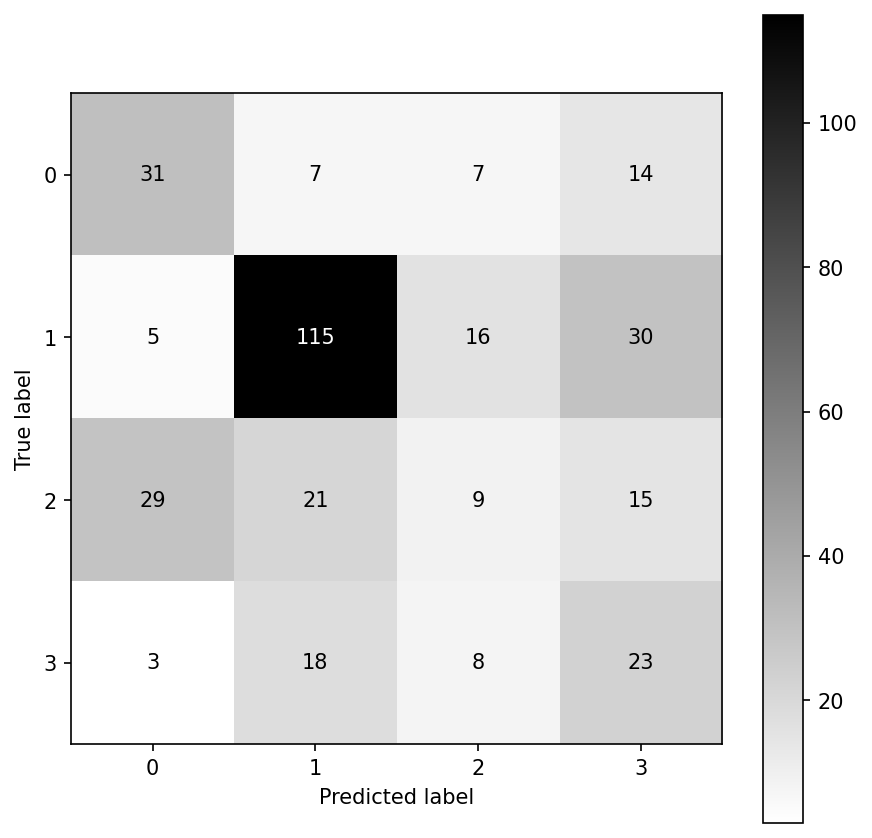

Sensitivity : 0.45 ± 0.21
Sensitivity :  [0.52542373 0.69277108 0.12162162 0.44230769]
Specificity : 0.83 ± 0.06
Specificity :  [0.87328767 0.75135135 0.88808664 0.80267559]
Accuracy : 0.75 ± 0.04
Accuracy :  [0.81481481 0.72364672 0.72649573 0.74928775]
Average Weighted로 계산
정확도: 0.5071, 정밀도: 0.5034, 재현율: 0.5071, F1-score: 0.4989
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        59
           1       0.71      0.69      0.70       166
           2       0.23      0.12      0.16        74
           3       0.28      0.44      0.34        52

    accuracy                           0.51       351
   macro avg       0.42      0.45      0.42       351
weighted avg       0.50      0.51      0.50       351



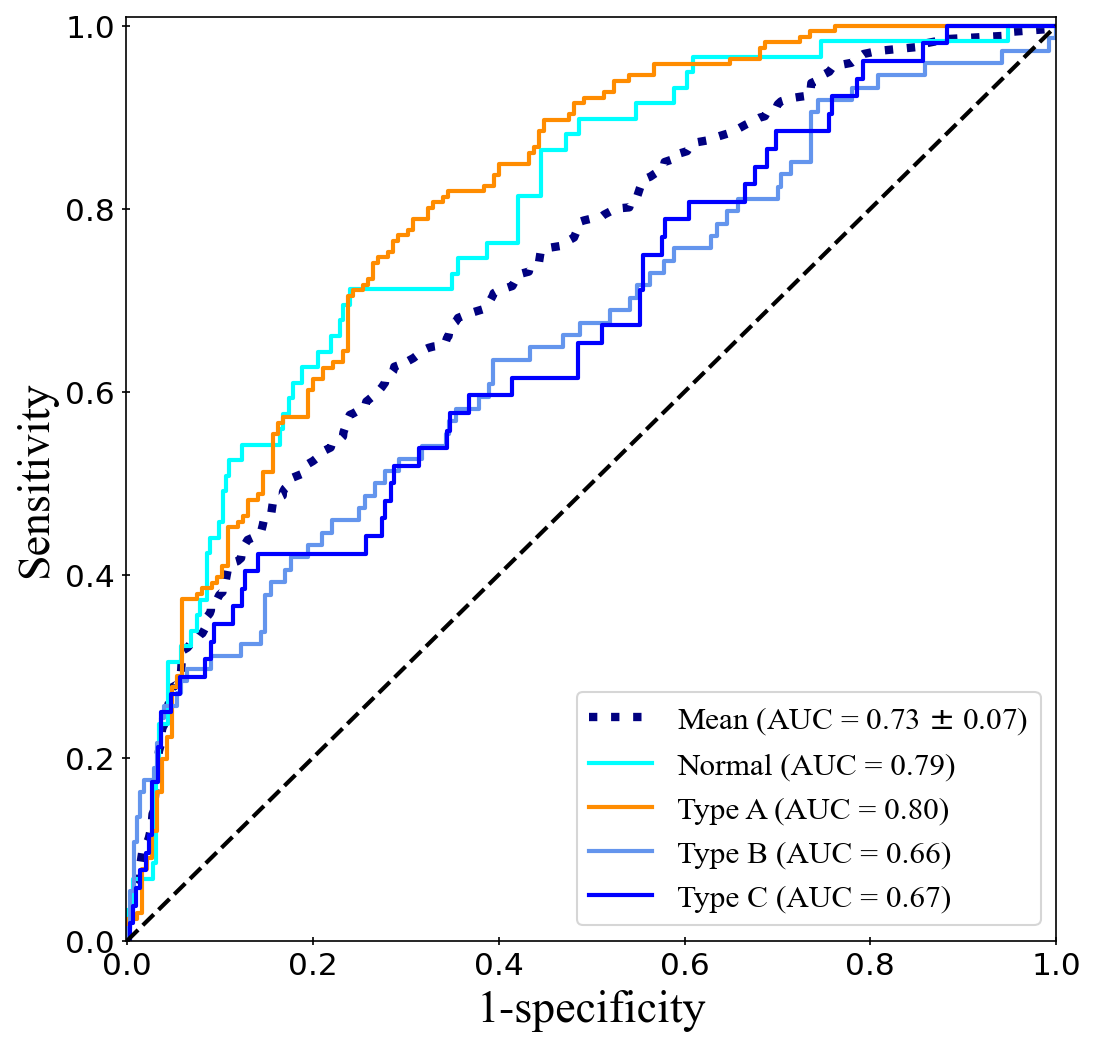

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import scipy

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h


lw = 2
lr_all_fpr = np.unique(np.concatenate([lr_fpr[i] for i in range(n_classes)]))
lr_mean_tpr = np.zeros_like(lr_all_fpr)
for i in range(n_classes):
    lr_mean_tpr += np.interp(lr_all_fpr, lr_fpr[i], lr_tpr[i])

lr_mean_tpr /= n_classes

lr_fpr["macro"] = lr_all_fpr
lr_tpr["macro"] = lr_mean_tpr
lr_roc_auc["macro"] = auc(lr_fpr["macro"], lr_tpr["macro"])

print("="*100)
print("LR")

cnf_matrix = confusion_matrix(y_test, pred)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [7, 7]

plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()


FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
lr_TPR = TP/(TP+FN)
# Specificity or true negative rate
lr_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
lr_ACC = (TP+TN)/(TP+FP+FN+TN)


print("="*100)

print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(lr_TPR),np.std(lr_TPR)))
print("Sensitivity : ", lr_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(lr_TNR),np.std(lr_TNR)))
print("Specificity : ", lr_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(lr_ACC),np.std(lr_ACC)))
print("Accuracy : ", lr_ACC)

print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    lr_fpr["macro"],
    lr_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(lr_roc_auc["macro"], lr_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        lr_fpr[i],
        lr_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, lr_roc_auc[i]),
    )
    
plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.001, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22, fontproperties="Times New Roman")
plt.ylabel("Sensitivity", fontsize=22, fontproperties="Times New Roman")
plt.tick_params(axis='x', direction='inout', labelsize=15)
plt.tick_params(axis='y', direction='inout', labelsize=15)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('lr_roccurve.png', dpi=600)
plt.show()

# SVM

In [23]:
classifier = classlist[1]


classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

In [24]:
# Compute ROC curve and ROC area for each class
svm_fpr = dict()
svm_tpr = dict()
svm_roc_auc = dict()
svm_std_auc = []

for i in range(n_classes):
    svm_fpr[i], svm_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    svm_roc_auc[i] = auc(svm_fpr[i], svm_tpr[i])


for i in range(len(svm_roc_auc)):
    svm_std_auc.append(svm_roc_auc[i])

svm_std_auc1 = np.std(svm_std_auc)
print(svm_std_auc)
print('std_auc : ',svm_std_auc1)


# Compute micro-average ROC curve and ROC area
svm_fpr["micro"], svm_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
svm_roc_auc["micro"] = auc(svm_fpr["micro"], svm_tpr["micro"])


[0.8105990248432785, 0.801074568544448, 0.6580642013855011, 0.7238229997427322]
std_auc :  0.06206430925156597


SVM


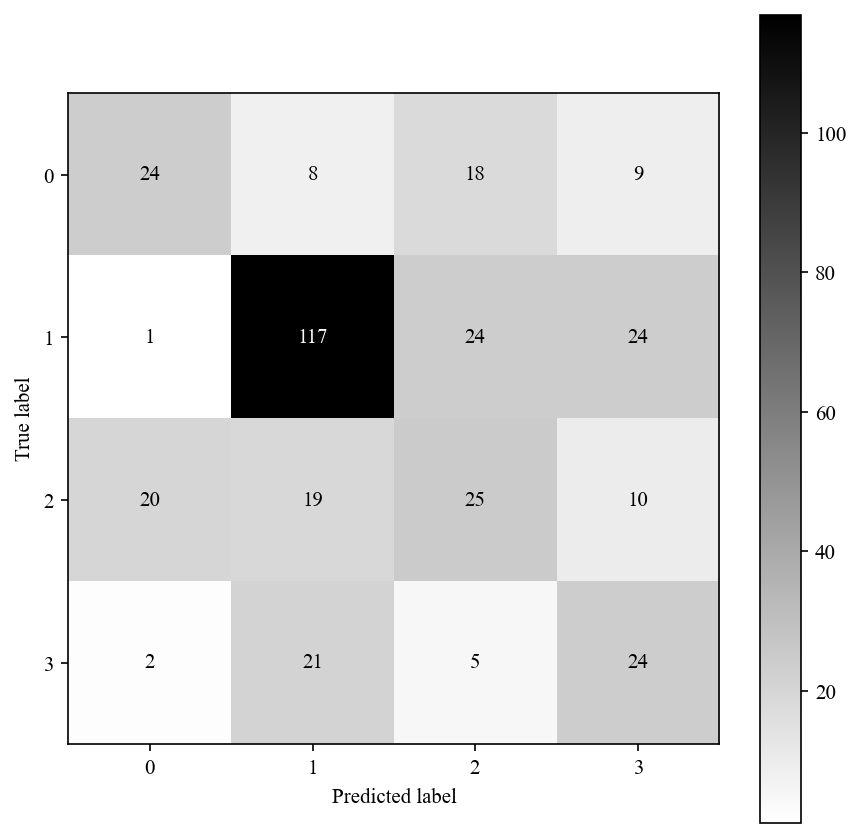

Sensitivity : 0.48 ± 0.14
Sensitivity :  [0.40677966 0.70481928 0.33783784 0.46153846]
Specificity : 0.84 ± 0.06
Specificity :  [0.92123288 0.74054054 0.83032491 0.85618729]
Accuracy : 0.77 ± 0.05
Accuracy :  [0.83475783 0.72364672 0.72649573 0.7977208 ]
Average Weighted로 계산
정확도: 0.5413, 정밀도: 0.5475, 재현율: 0.5413, F1-score: 0.5424
              precision    recall  f1-score   support

           0       0.51      0.41      0.45        59
           1       0.71      0.70      0.71       166
           2       0.35      0.34      0.34        74
           3       0.36      0.46      0.40        52

    accuracy                           0.54       351
   macro avg       0.48      0.48      0.48       351
weighted avg       0.55      0.54      0.54       351



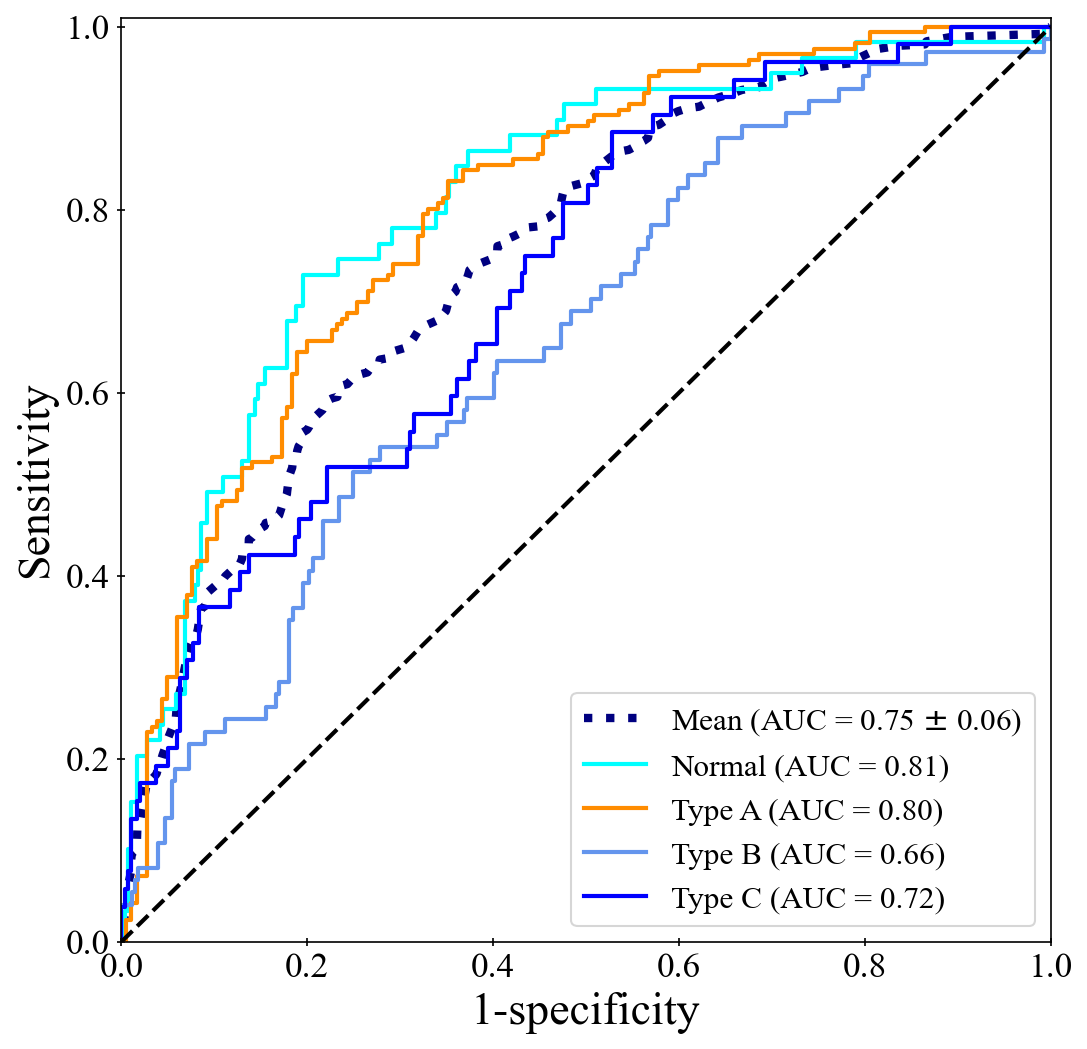

In [25]:
lw = 2
# First aggregate all false positive rates
svm_all_fpr = np.unique(np.concatenate([svm_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
svm_mean_tpr = np.zeros_like(svm_all_fpr)
for i in range(n_classes):
    svm_mean_tpr += np.interp(svm_all_fpr, svm_fpr[i], svm_tpr[i])

# Finally average it and compute AUC
svm_mean_tpr /= n_classes

svm_fpr["macro"] = svm_all_fpr
svm_tpr["macro"] = svm_mean_tpr
svm_roc_auc["macro"] = auc(svm_fpr["macro"], svm_tpr["macro"])

print("="*100)
print("SVM")

cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
svm_TPR = TP/(TP+FN)
# Specificity or true negative rate
svm_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
svm_ACC = (TP+TN)/(TP+FP+FN+TN)


print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(svm_TPR),np.std(svm_TPR)))
print("Sensitivity : ", svm_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(svm_TNR),np.std(svm_TNR)))
print("Specificity : ", svm_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(svm_ACC),np.std(svm_ACC)))
print("Accuracy : ", svm_ACC)


print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    svm_fpr["macro"],
    svm_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(svm_roc_auc["macro"], svm_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        svm_fpr[i],
        svm_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, svm_roc_auc[i]),
    )

plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.001, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22, fontproperties="Times New Roman")
plt.ylabel("Sensitivity", fontsize=22, fontproperties="Times New Roman")

plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('svm_roccurve.png', dpi=600)
plt.show()

# RF

In [26]:
classifier = classlist[2]


classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

In [27]:
# Compute ROC curve and ROC area for each class
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    rf_roc_auc[i] = auc(rf_fpr[i], rf_tpr[i])

rf_std_auc = []

for i in range(len(rf_roc_auc)):
    rf_std_auc.append(rf_roc_auc[i])
rf_std_auc1 = np.std(rf_std_auc)
print(rf_std_auc)
print('std_auc : ',rf_std_auc1)

# Compute micro-average ROC curve and ROC area
rf_fpr["micro"], rf_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
rf_roc_auc["micro"] = auc(rf_fpr["micro"], rf_tpr["micro"])

[0.7873229626189924, 0.8075219798111364, 0.6521611864572154, 0.7184203756110111]
std_auc :  0.061181402738618836


RF


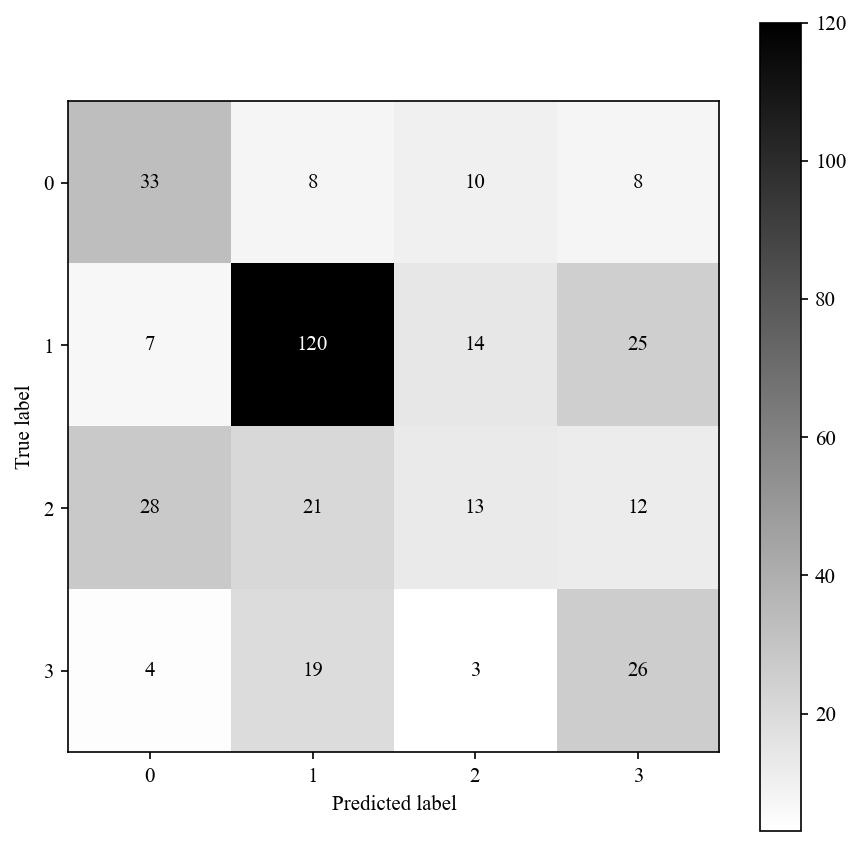

Sensitivity : 0.49 ± 0.20
Sensitivity :  [0.55932203 0.72289157 0.17567568 0.5       ]
Specificity : 0.84 ± 0.06
Specificity :  [0.86643836 0.74054054 0.90252708 0.84949833]
Accuracy : 0.77 ± 0.03
Accuracy :  [0.81481481 0.73219373 0.74928775 0.7977208 ]
Average Weighted로 계산
정확도: 0.5470, 정밀도: 0.5376, 재현율: 0.5470, F1-score: 0.5352
              precision    recall  f1-score   support

           0       0.46      0.56      0.50        59
           1       0.71      0.72      0.72       166
           2       0.33      0.18      0.23        74
           3       0.37      0.50      0.42        52

    accuracy                           0.55       351
   macro avg       0.47      0.49      0.47       351
weighted avg       0.54      0.55      0.54       351



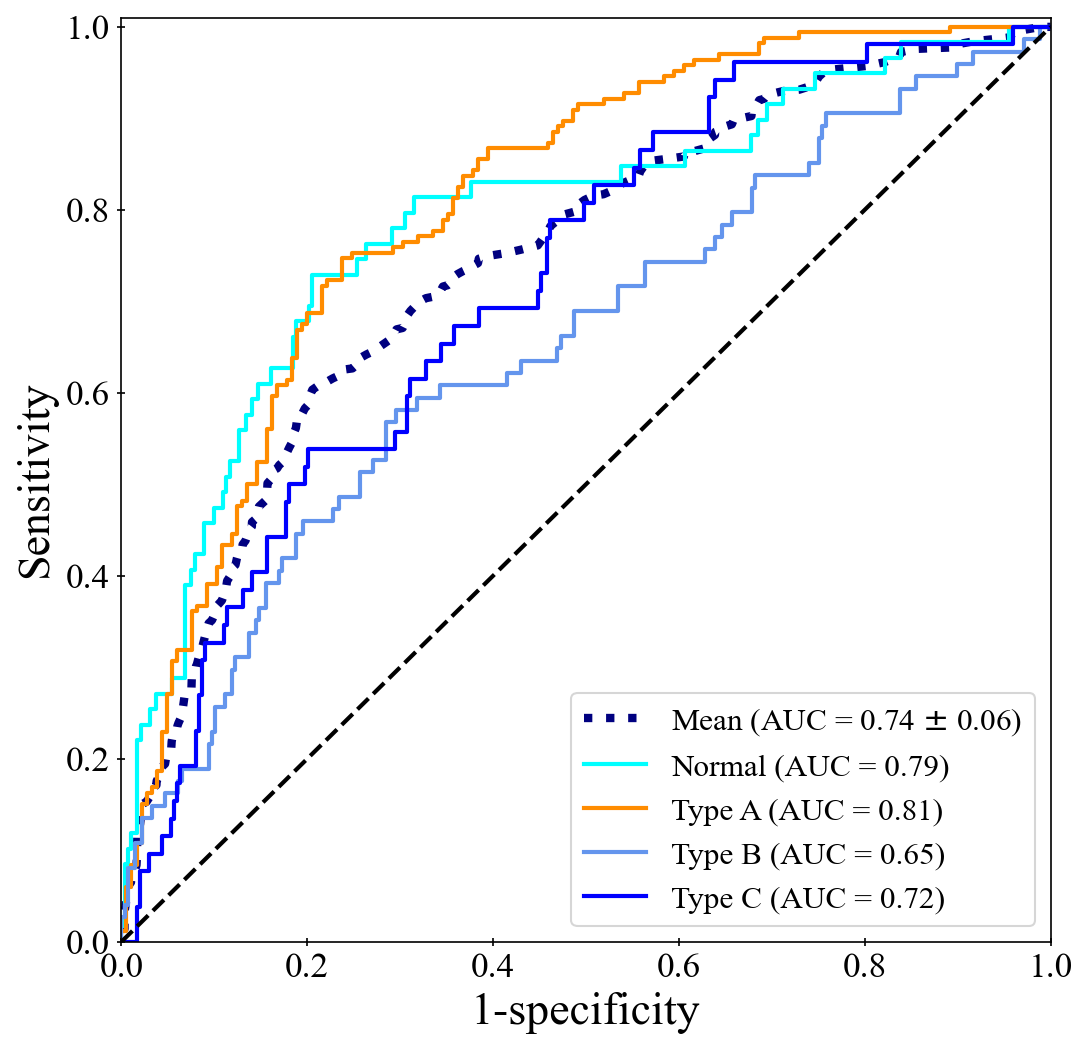

In [28]:
lw = 2
# First aggregate all false positive rates
rf_all_fpr = np.unique(np.concatenate([rf_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
rf_mean_tpr = np.zeros_like(rf_all_fpr)
for i in range(n_classes):
    rf_mean_tpr += np.interp(rf_all_fpr, rf_fpr[i], rf_tpr[i])

# Finally average it and compute AUC
rf_mean_tpr /= n_classes

rf_fpr["macro"] = rf_all_fpr
rf_tpr["macro"] = rf_mean_tpr
rf_roc_auc["macro"] = auc(rf_fpr["macro"], rf_tpr["macro"])

print("="*100)
print("RF")

cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
rf_TPR = TP/(TP+FN)
# Specificity or true negative rate
rf_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
rf_ACC = (TP+TN)/(TP+FP+FN+TN)


print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(rf_TPR),np.std(rf_TPR)))
print("Sensitivity : ", rf_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(rf_TNR),np.std(rf_TNR)))
print("Specificity : ", rf_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(rf_ACC),np.std(rf_ACC)))
print("Accuracy : ", rf_ACC)



print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    rf_fpr["macro"],
    rf_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(rf_roc_auc["macro"], rf_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        rf_fpr[i],
        rf_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, rf_roc_auc[i]),
    )
    
plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.001, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22)
plt.ylabel("Sensitivity", fontsize=22)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('rf_roccurve.png', dpi=600)
plt.show()

# XGB

In [29]:
classifier = classlist[3]
classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

In [30]:
# Compute ROC curve and ROC area for each class
xgb_fpr = dict()
xgb_tpr = dict()
xgb_roc_auc = dict()

for i in range(n_classes):
    xgb_fpr[i], xgb_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    xgb_roc_auc[i] = auc(xgb_fpr[i], xgb_tpr[i])

xgb_std_auc = []
for i in range(len(xgb_roc_auc)):
    xgb_std_auc.append(xgb_roc_auc[i])

xgb_std_auc1 = np.std(xgb_std_auc)
# print(std_auc)
print('std_auc : ',xgb_std_auc1)


# Compute micro-average ROC curve and ROC area
xgb_fpr["micro"], xgb_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
xgb_roc_auc["micro"] = auc(xgb_fpr["micro"], xgb_tpr["micro"])

std_auc :  0.0553039314263245


XGB


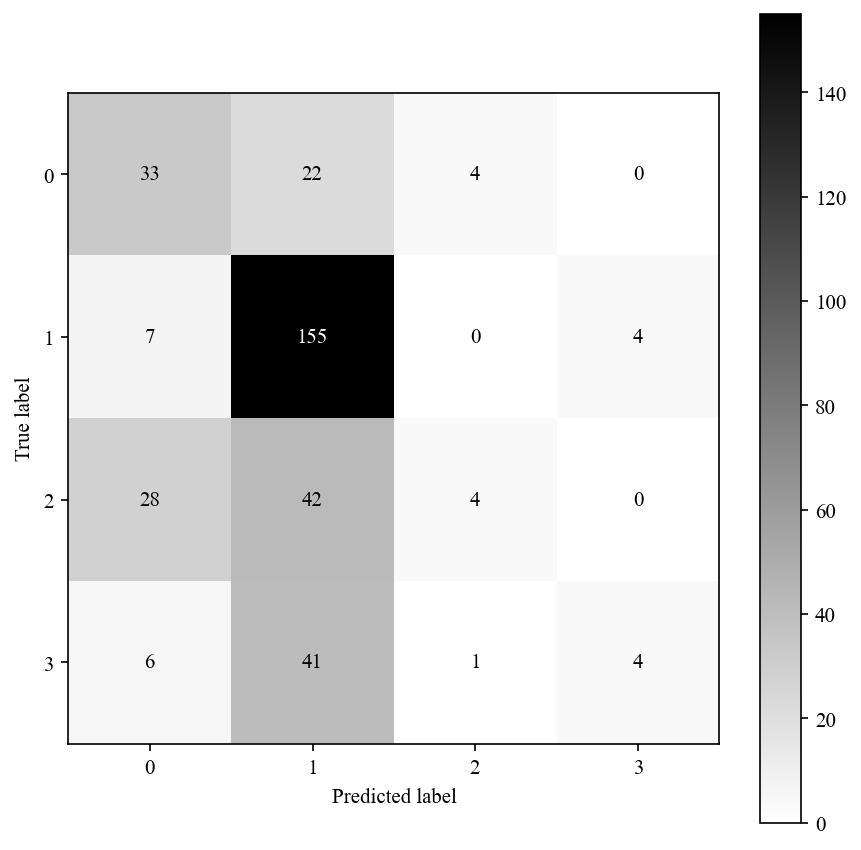

Sensitivity : 0.41 ± 0.37
Sensitivity :  [0.55932203 0.93373494 0.05405405 0.07692308]
Specificity : 0.82 ± 0.23
Specificity :  [0.85958904 0.43243243 0.98194946 0.98662207]
Accuracy : 0.78 ± 0.07
Accuracy :  [0.80911681 0.66951567 0.78632479 0.85185185]
Average Weighted로 계산
정확도: 0.5584, 정밀도: 0.5247, 재현율: 0.5584, F1-score: 0.4676
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        59
           1       0.60      0.93      0.73       166
           2       0.44      0.05      0.10        74
           3       0.50      0.08      0.13        52

    accuracy                           0.56       351
   macro avg       0.50      0.41      0.36       351
weighted avg       0.52      0.56      0.47       351



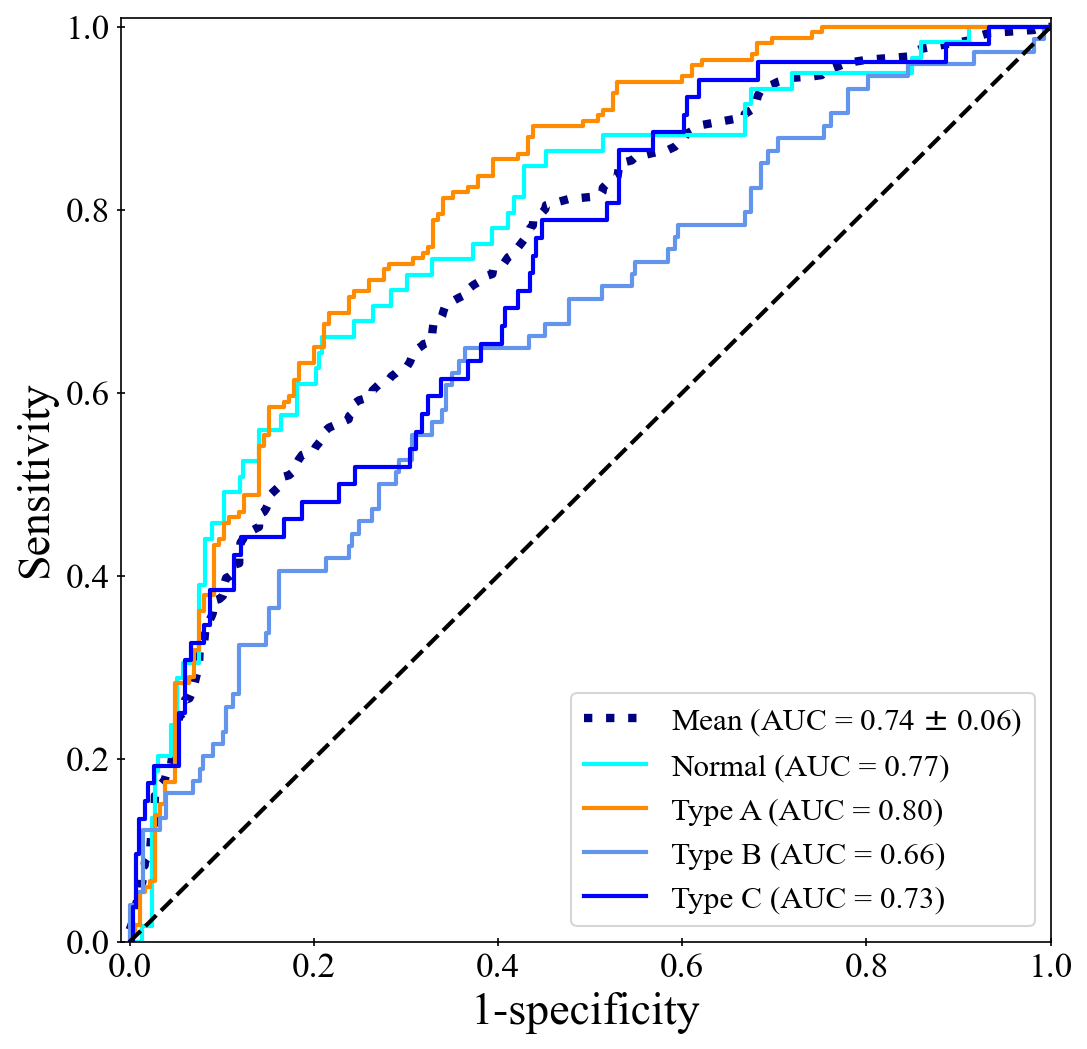

In [31]:
lw = 2
# First aggregate all false positive rates
xgb_all_fpr = np.unique(np.concatenate([xgb_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
xgb_mean_tpr = np.zeros_like(xgb_all_fpr)
for i in range(n_classes):
    xgb_mean_tpr += np.interp(xgb_all_fpr, xgb_fpr[i], xgb_tpr[i])

# Finally average it and compute AUC
xgb_mean_tpr /= n_classes

xgb_fpr["macro"] = xgb_all_fpr
xgb_tpr["macro"] = xgb_mean_tpr
xgb_roc_auc["macro"] = auc(xgb_fpr["macro"], xgb_tpr["macro"])

print("="*100)
print("XGB")

cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
xgb_TPR = TP/(TP+FN)
# Specificity or true negative rate
xgb_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
xgb_ACC = (TP+TN)/(TP+FP+FN+TN)


print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(xgb_TPR),np.std(xgb_TPR)))
print("Sensitivity : ", xgb_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(xgb_TNR),np.std(xgb_TNR)))
print("Specificity : ", xgb_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(xgb_ACC),np.std(xgb_ACC)))
print("Accuracy : ", xgb_ACC)



print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    xgb_fpr["macro"],
    xgb_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(xgb_roc_auc["macro"], xgb_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        xgb_fpr[i],
        xgb_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, xgb_roc_auc[i]),
    )
    
plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22)
plt.ylabel("Sensitivity", fontsize=22)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('xgb_roccurve.png', dpi=600)
plt.show()

# MLP

In [32]:
classifier = classlist[4]
classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

[11:51:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:51:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:51:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  Thi

In [33]:
# Compute ROC curve and ROC area for each class
mlp_fpr = dict()
mlp_tpr = dict()
mlp_roc_auc = dict()

for i in range(n_classes):
    mlp_fpr[i], mlp_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    mlp_roc_auc[i] = auc(mlp_fpr[i], mlp_tpr[i])

mlp_std_auc = []
for i in range(len(mlp_roc_auc)):
    mlp_std_auc.append(mlp_roc_auc[i])

mlp_std_auc1 = np.std(mlp_std_auc)
# print(std_auc)
print('std_auc : ',mlp_std_auc1)


# Compute micro-average ROC curve and ROC area
mlp_fpr["micro"], mlp_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
mlp_roc_auc["micro"] = auc(mlp_fpr["micro"], mlp_tpr["micro"])

std_auc :  0.06331245640427975


MLP


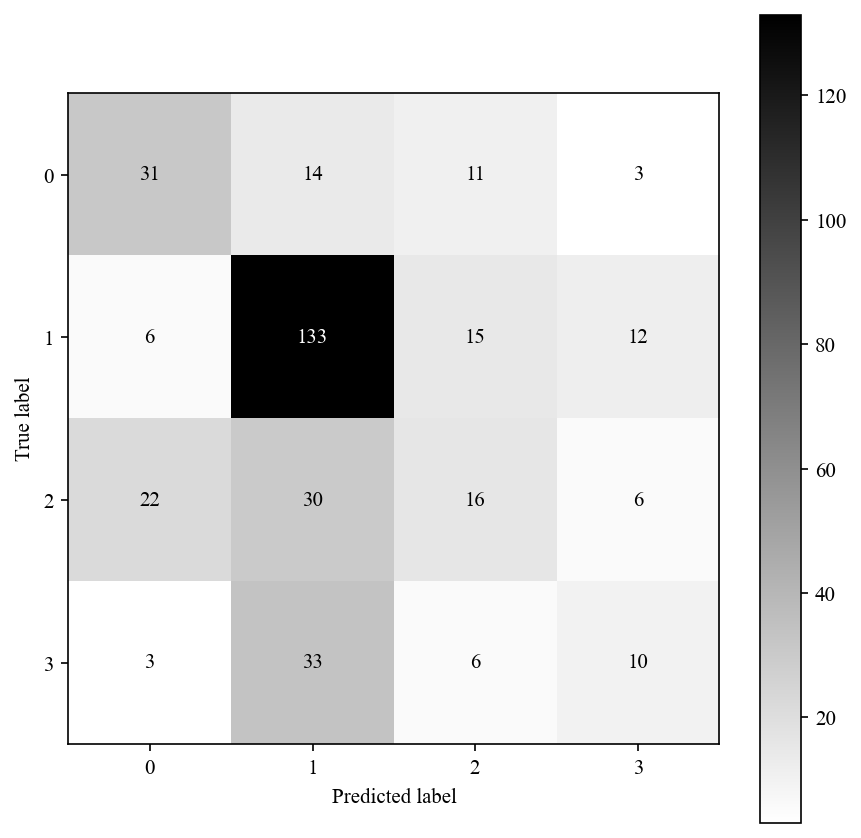

Sensitivity : 0.43 ± 0.25
Sensitivity :  [0.52542373 0.80120482 0.21621622 0.19230769]
Specificity : 0.82 ± 0.14
Specificity :  [0.89383562 0.58378378 0.88447653 0.92976589]
Accuracy : 0.77 ± 0.06
Accuracy :  [0.83190883 0.68660969 0.74358974 0.82051282]
Average Weighted로 계산
정확도: 0.5413, 정밀도: 0.5016, 재현율: 0.5413, F1-score: 0.5117
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        59
           1       0.63      0.80      0.71       166
           2       0.33      0.22      0.26        74
           3       0.32      0.19      0.24        52

    accuracy                           0.54       351
   macro avg       0.45      0.43      0.43       351
weighted avg       0.50      0.54      0.51       351



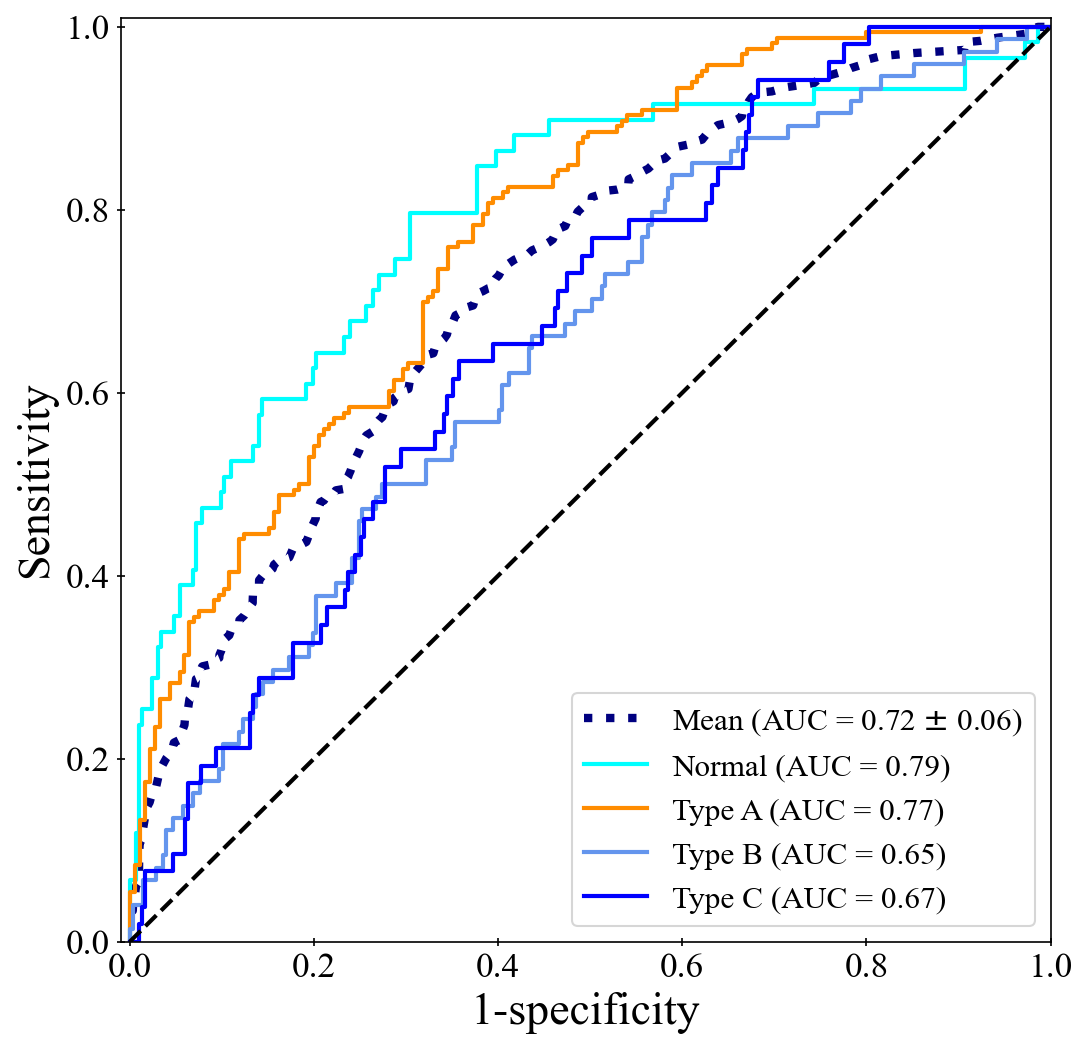

In [34]:
lw = 2
# First aggregate all false positive rates
mlp_all_fpr = np.unique(np.concatenate([mlp_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mlp_mean_tpr = np.zeros_like(mlp_all_fpr)
for i in range(n_classes):
    mlp_mean_tpr += np.interp(mlp_all_fpr, mlp_fpr[i], mlp_tpr[i])

# Finally average it and compute AUC
mlp_mean_tpr /= n_classes

mlp_fpr["macro"] = mlp_all_fpr
mlp_tpr["macro"] = mlp_mean_tpr
mlp_roc_auc["macro"] = auc(mlp_fpr["macro"], mlp_tpr["macro"])

print("="*100)
print("MLP")

cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
mlp_TPR = TP/(TP+FN)
# Specificity or true negative rate
mlp_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
mlp_ACC = (TP+TN)/(TP+FP+FN+TN)


print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(mlp_TPR),np.std(mlp_TPR)))
print("Sensitivity : ", mlp_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(mlp_TNR),np.std(mlp_TNR)))
print("Specificity : ", mlp_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(mlp_ACC),np.std(mlp_ACC)))
print("Accuracy : ", mlp_ACC)



print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    mlp_fpr["macro"],
    mlp_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(mlp_roc_auc["macro"], mlp_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        mlp_fpr[i],
        mlp_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, mlp_roc_auc[i]),
    )
    
plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22)
plt.ylabel("Sensitivity", fontsize=22)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('mlp_roccurve.png', dpi=600)
plt.show()

# KNN

In [35]:
classifier = classlist[5]
classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

In [36]:
# Compute ROC curve and ROC area for each class
knn_fpr = dict()
knn_tpr = dict()
knn_roc_auc = dict()

for i in range(n_classes):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    knn_roc_auc[i] = auc(knn_fpr[i], knn_tpr[i])

knn_std_auc = []
for i in range(len(knn_roc_auc)):
    knn_std_auc.append(knn_roc_auc[i])

knn_std_auc1 = np.std(knn_std_auc)
# print(std_auc)
print('std_auc : ',knn_std_auc1)


# Compute micro-average ROC curve and ROC area
knn_fpr["micro"], knn_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
knn_roc_auc["micro"] = auc(knn_fpr["micro"], knn_tpr["micro"])

std_auc :  0.06515054554497422


KNN


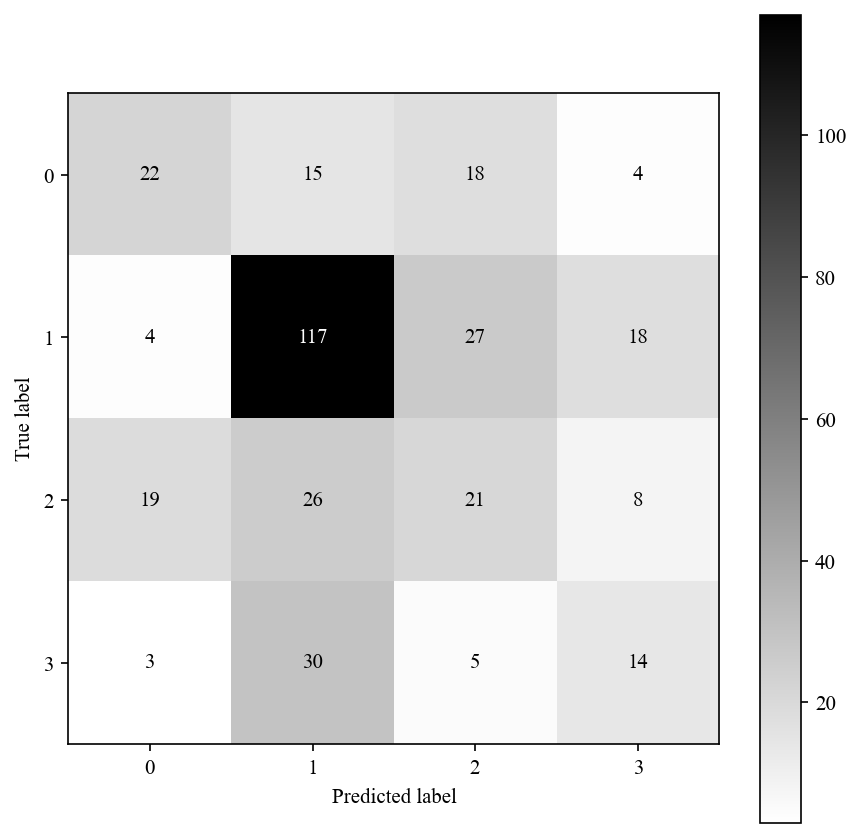

Sensitivity : 0.41 ± 0.18
Sensitivity :  [0.37288136 0.70481928 0.28378378 0.26923077]
Specificity : 0.81 ± 0.12
Specificity :  [0.9109589  0.61621622 0.81949458 0.89966555]
Accuracy : 0.75 ± 0.07
Accuracy :  [0.82051282 0.65811966 0.70655271 0.80626781]
Average Weighted로 계산
정확도: 0.4957, 정밀도: 0.4809, 재현율: 0.4957, F1-score: 0.4860
              precision    recall  f1-score   support

           0       0.46      0.37      0.41        59
           1       0.62      0.70      0.66       166
           2       0.30      0.28      0.29        74
           3       0.32      0.27      0.29        52

    accuracy                           0.50       351
   macro avg       0.42      0.41      0.41       351
weighted avg       0.48      0.50      0.49       351



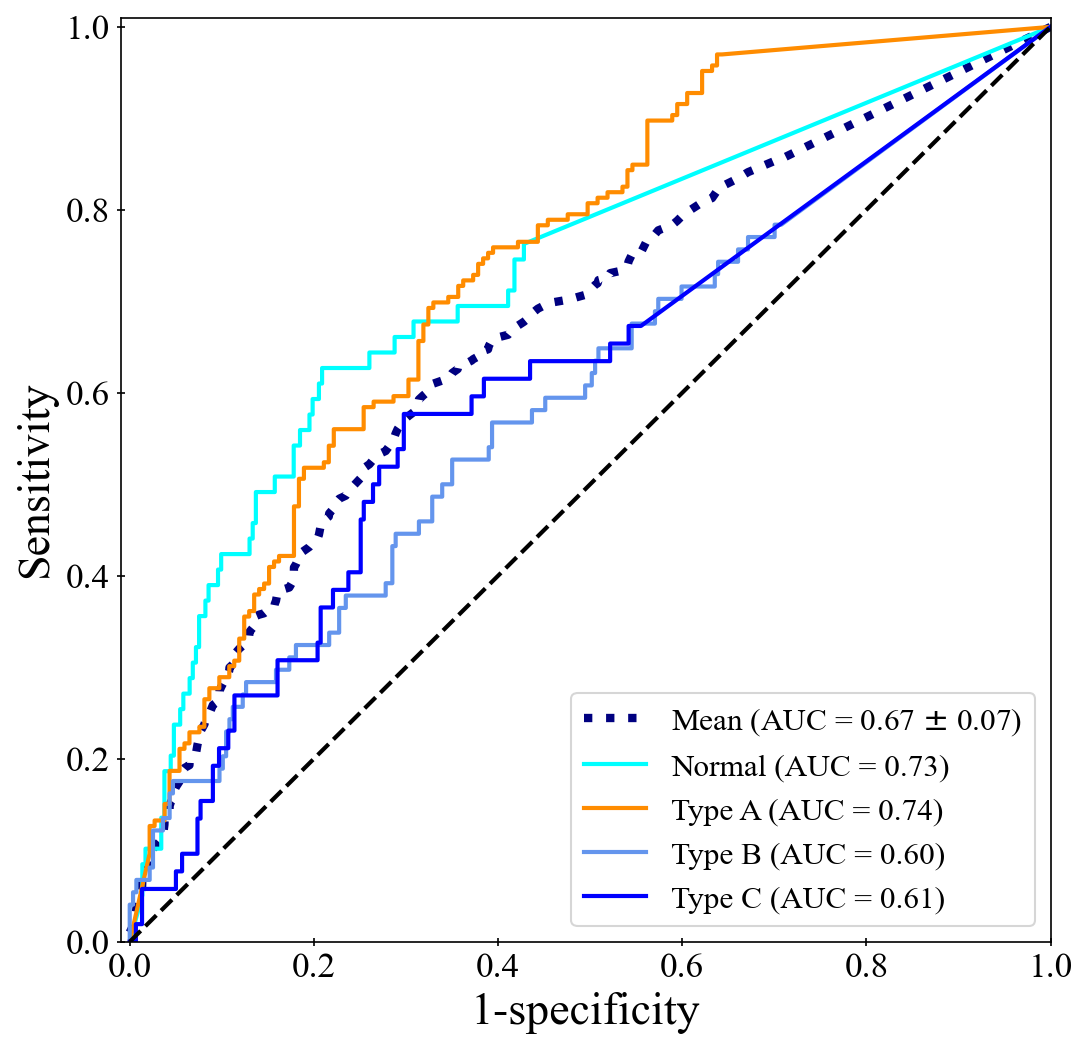

In [37]:
lw = 2
# First aggregate all false positive rates
knn_all_fpr = np.unique(np.concatenate([knn_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
knn_mean_tpr = np.zeros_like(knn_all_fpr)
for i in range(n_classes):
    knn_mean_tpr += np.interp(knn_all_fpr, knn_fpr[i], knn_tpr[i])

# Finally average it and compute AUC
knn_mean_tpr /= n_classes

knn_fpr["macro"] = knn_all_fpr
knn_tpr["macro"] = knn_mean_tpr
knn_roc_auc["macro"] = auc(knn_fpr["macro"], knn_tpr["macro"])

print("="*100)
print("KNN")

cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
knn_TPR = TP/(TP+FN)
# Specificity or true negative rate
knn_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
knn_ACC = (TP+TN)/(TP+FP+FN+TN)


print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(knn_TPR),np.std(knn_TPR)))
print("Sensitivity : ", knn_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(knn_TNR),np.std(knn_TNR)))
print("Specificity : ", knn_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(knn_ACC),np.std(knn_ACC)))
print("Accuracy : ", knn_ACC)



print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    knn_fpr["macro"],
    knn_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(knn_roc_auc["macro"], knn_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        knn_fpr[i],
        knn_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, knn_roc_auc[i]),
    )
    
plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22)
plt.ylabel("Sensitivity", fontsize=22)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('knn_roccurve.png', dpi=600)
plt.show()

# LGBM

In [38]:
classifier = classlist[6]
classifier.fit(train_x, train_y)
proba = classifier.predict_proba(test_x)
pred = classifier.predict(test_x)

In [39]:
# Compute ROC curve and ROC area for each class
lgbm_fpr = dict()
lgbm_tpr = dict()
lgbm_roc_auc = dict()

for i in range(n_classes):
    lgbm_fpr[i], lgbm_tpr[i], _ = roc_curve(y_test1[:, i], proba[:, i])
    lgbm_roc_auc[i] = auc(lgbm_fpr[i], lgbm_tpr[i])

lgbm_std_auc = []
for i in range(len(lgbm_roc_auc)):
    lgbm_std_auc.append(lgbm_roc_auc[i])

lgbm_std_auc1 = np.std(lgbm_std_auc)
# print(std_auc)
print('std_auc : ',lgbm_std_auc1)


# Compute micro-average ROC curve and ROC area
lgbm_fpr["micro"], lgbm_tpr["micro"], _ = roc_curve(y_test1.ravel(), proba.ravel())
lgbm_roc_auc["micro"] = auc(lgbm_fpr["micro"], lgbm_tpr["micro"])

std_auc :  0.062450408900039917


LGBM


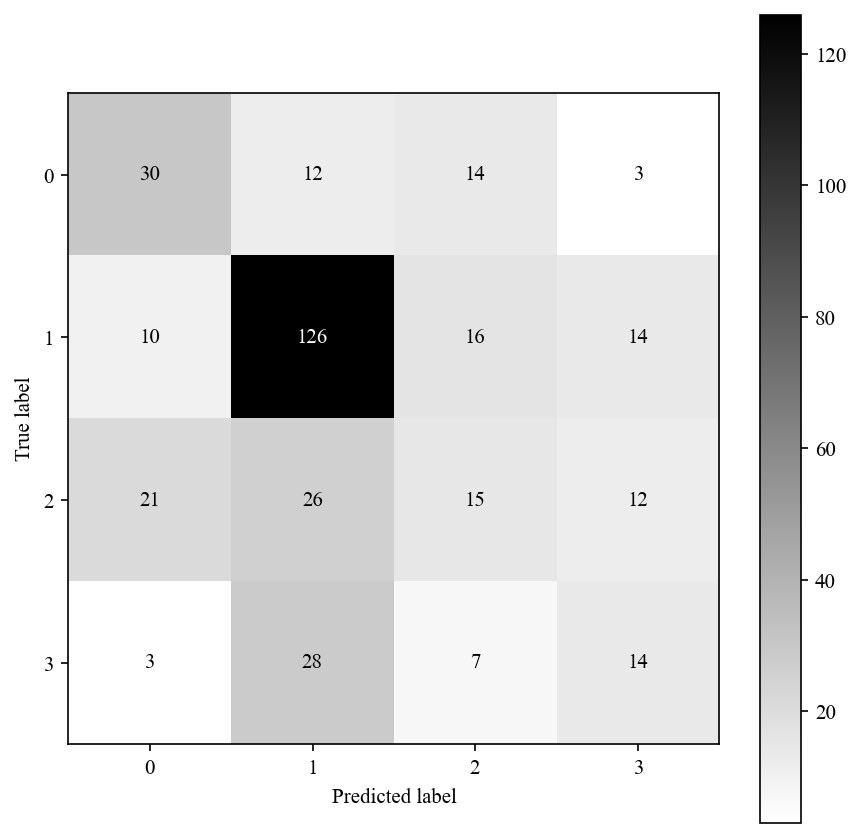

Sensitivity : 0.43 ± 0.22
Sensitivity :  [0.50847458 0.75903614 0.2027027  0.26923077]
Specificity : 0.82 ± 0.11
Specificity :  [0.88356164 0.64324324 0.86642599 0.90301003]
Accuracy : 0.76 ± 0.05
Accuracy :  [0.82051282 0.6980057  0.72649573 0.80911681]
Average Weighted로 계산
정확도: 0.5271, 정밀도: 0.4982, 재현율: 0.5271, F1-score: 0.5088
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        59
           1       0.66      0.76      0.70       166
           2       0.29      0.20      0.24        74
           3       0.33      0.27      0.29        52

    accuracy                           0.53       351
   macro avg       0.43      0.43      0.43       351
weighted avg       0.50      0.53      0.51       351



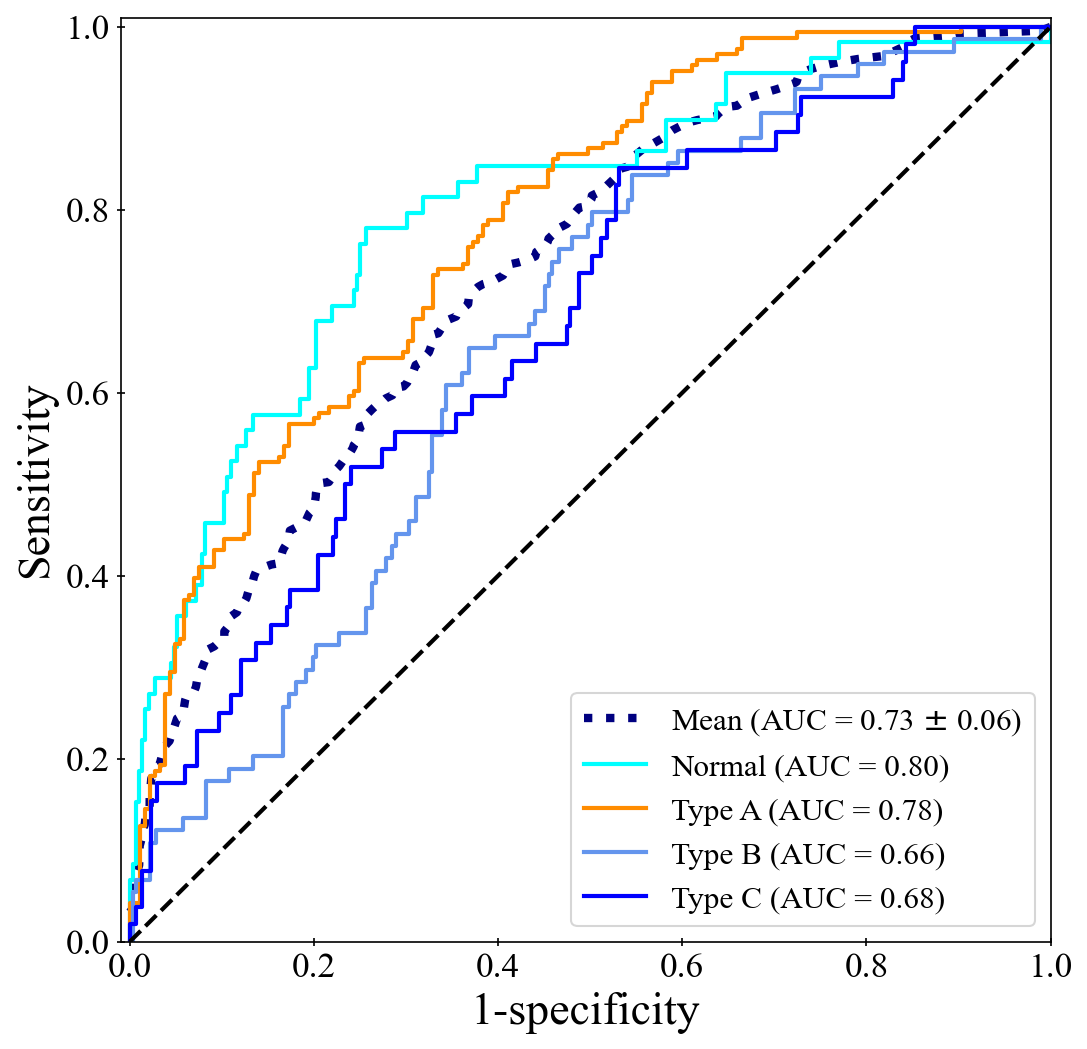

In [40]:
lw = 2
# First aggregate all false positive rates
lgbm_all_fpr = np.unique(np.concatenate([lgbm_fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
lgbm_mean_tpr = np.zeros_like(lgbm_all_fpr)
for i in range(n_classes):
    lgbm_mean_tpr += np.interp(lgbm_all_fpr, lgbm_fpr[i], lgbm_tpr[i])

# Finally average it and compute AUC
lgbm_mean_tpr /= n_classes

lgbm_fpr["macro"] = lgbm_all_fpr
lgbm_tpr["macro"] = lgbm_mean_tpr
lgbm_roc_auc["macro"] = auc(lgbm_fpr["macro"], lgbm_tpr["macro"])

print("="*100)
print("LGBM")

cnf_matrix = confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, test_x, y_test, cmap='binary')
plt.show()

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
lgbm_TPR = TP/(TP+FN)
# Specificity or true negative rate
lgbm_TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
lgbm_ACC = (TP+TN)/(TP+FP+FN+TN)


print("Sensitivity : {0:.2f} ± {1:0.2f}".format(np.mean(lgbm_TPR),np.std(lgbm_TPR)))
print("Sensitivity : ", lgbm_TPR)
print("Specificity : {0:.2f} ± {1:0.2f}".format(np.mean(lgbm_TNR),np.std(lgbm_TNR)))
print("Specificity : ", lgbm_TNR)
print("Accuracy : {0:.2f} ± {1:0.2f}".format(np.mean(lgbm_ACC),np.std(lgbm_ACC)))
print("Accuracy : ", lgbm_ACC)



print("="*100)
print("Average Weighted로 계산")

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1score = f1_score(y_test, pred, average='weighted')

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1-score: {3:.4f}'.format(accuracy , precision ,recall, f1score))

print(classification_report(y_test, pred, labels=[0, 1, 2, 3]))

plt.figure(figsize=(8,8))
plt.plot(
    lgbm_fpr["macro"],
    lgbm_tpr["macro"],
    label="Mean (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(lgbm_roc_auc["macro"], lgbm_std_auc1),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue"])
labels = cycle(["Normal", "Type A", "Type B", "Type C"])
for i, color, label in zip(range(n_classes), colors, labels):
    plt.plot(
        lgbm_fpr[i],
        lgbm_tpr[i],
        color=color,
        lw=lw,
        label= label + " (AUC = {1:0.2f})".format(i, lgbm_roc_auc[i]),
    )
    
plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])
plt.xlabel("1-specificity", fontsize=22)
plt.ylabel("Sensitivity", fontsize=22)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('lgbm_roccurve.png', dpi=600)
plt.show()

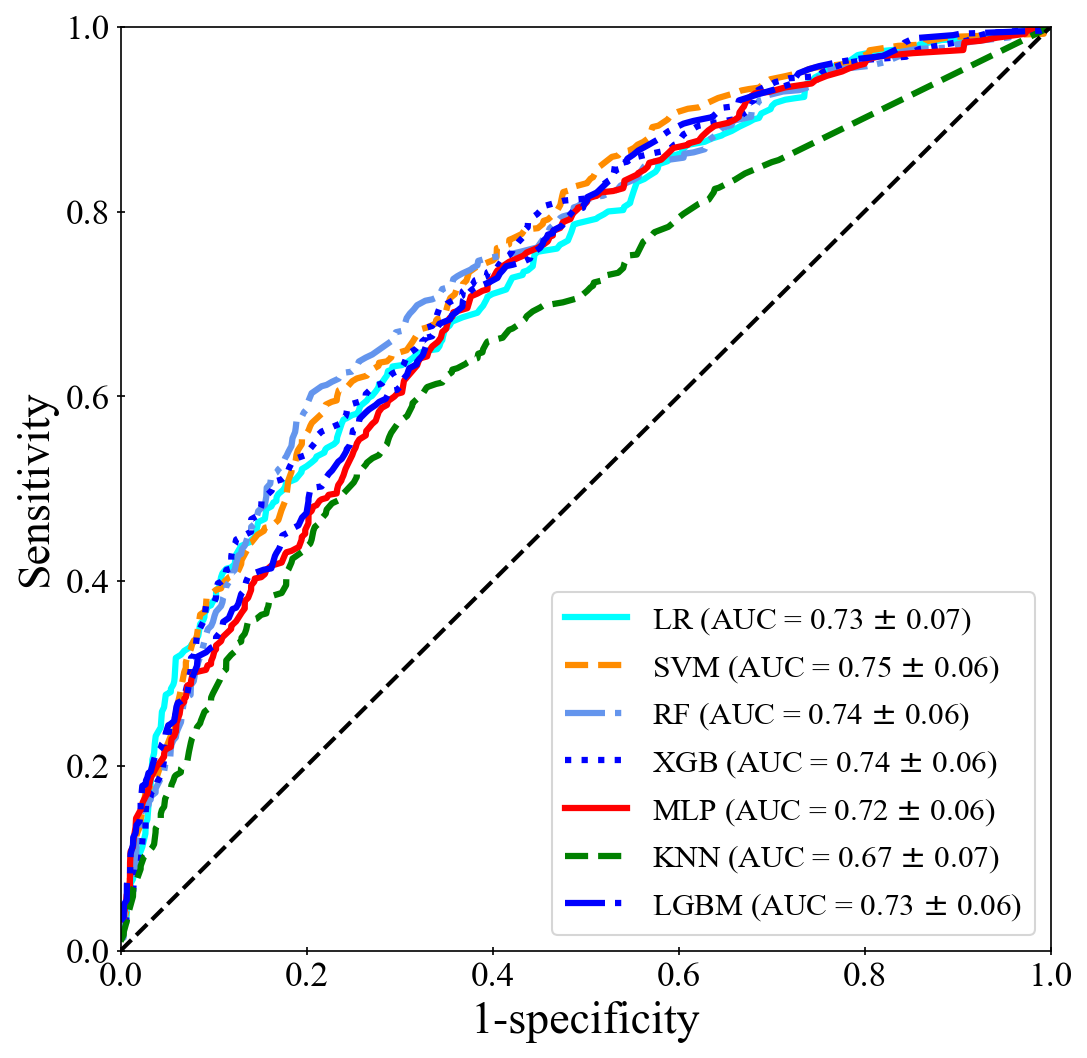

In [41]:
plt.figure(figsize=(8,8))
plt.plot(
    lr_fpr["macro"],
    lr_tpr["macro"],
    label="LR (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(lr_roc_auc["macro"], lr_std_auc1),
    color="aqua",
    linestyle="solid",
    linewidth=3,
)
plt.plot(
    svm_fpr["macro"],
    svm_tpr["macro"],
    label="SVM (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(svm_roc_auc["macro"], svm_std_auc1),
    color="darkorange",
    linestyle="--",
    linewidth=3,
)
plt.plot(
    rf_fpr["macro"],
    rf_tpr["macro"],
    label="RF (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(rf_roc_auc["macro"], rf_std_auc1),
    color="cornflowerblue",
    linestyle="-.",
    linewidth=3,
)
plt.plot(
    xgb_fpr["macro"],
    xgb_tpr["macro"],
    label="XGB (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(xgb_roc_auc["macro"], xgb_std_auc1),
    color="blue",
    linestyle="dotted",
    linewidth=3,
)
plt.plot(
    mlp_fpr["macro"],
    mlp_tpr["macro"],
    label="MLP (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(mlp_roc_auc["macro"], mlp_std_auc1),
    color="red",
    linestyle="solid",
    linewidth=3,
)
plt.plot(
    knn_fpr["macro"],
    knn_tpr["macro"],
    label="KNN (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(knn_roc_auc["macro"], knn_std_auc1),
    color="green",
    linestyle="--",
    linewidth=3,
)
plt.plot(
    lgbm_fpr["macro"],
    lgbm_tpr["macro"],
    label="LGBM (AUC = {0:0.2f} $\pm$ {1:0.2f})".format(lgbm_roc_auc["macro"], lgbm_std_auc1),
    color="blue",
    linestyle="-.",
    linewidth=3,
)

plt.rcParams['font.family'] = "Times New Roman"
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("1-specificity", fontsize=22)
plt.ylabel("Sensitivity", fontsize=22)
# plt.title("Receiver operating characteristic", fontsize=25)
plt.tick_params(axis='x', direction='inout', labelsize=17)
plt.tick_params(axis='y', direction='inout', labelsize=17)
plt.legend(loc="lower right", prop={'size' : 15})
plt.savefig('all_roccurve.jpg', dpi=600)
plt.show()


In [42]:
print("-"*50)
best_sens = max(np.mean(lr_TPR), np.mean(rf_TPR), np.mean(svm_TPR), np.mean(xgb_TPR))
print("best sens : ", best_sens)
print("-"*50)
best_spec = max(np.mean(lr_TNR), np.mean(rf_TNR), np.mean(xgb_TNR), np.mean(svm_TNR))
print("best spec : ", best_spec)
print("-"*50)
best_acc = max(np.mean(lr_ACC), np.mean(svm_ACC), np.mean(xgb_ACC), np.mean(rf_ACC))
print("best acc : ", best_acc)
print("-"*50)

--------------------------------------------------
best sens :  0.48947231895976023
--------------------------------------------------
best spec :  0.8397510750690989
--------------------------------------------------
best acc :  0.7792022792022792
--------------------------------------------------


In [43]:
def P_Importance(model, test_x, test_y):  # permutation importance 중요도 뽑기
    perm = PermutationImportance(
        model, scoring="roc_auc_ovr", random_state=Ran_state).fit(test_x, test_y)
    ftr_importances = eli5.format_as_dataframe(eli5.explain_weights(
        perm, top=134, feature_names=test_x.columns.tolist()))
    ftr_top = ftr_importances.sort_values(ascending=False, by='feature')[:]
    return ftr_top

In [44]:
Importance = pd.DataFrame(train_x.columns, columns=['feature'])
suf = ('_LR', '_SVM', '_RF', '_MLP', '_XGB', '_KNN', '_LGBM')

for i in range(7):
    PI = P_Importance(classlist[i], test_x, test_y).loc[:, ['feature', 'weight']]
    Importance = pd.merge(Importance, PI, on='feature',
                            suffixes=(suf[i-1], suf[i]))
Importance.rename(columns={'weight_LR': 'LR', 'weight_RF': 'RF', 'weight_XGB': 'XGB', 'weight_SVM': 'SVM', 'weight_MLP' : 'MLP', 'weight_KNN' : 'KNN', 'weight' : 'LGBM'}, inplace=True)
Importance['meanscore'] = Importance.apply(lambda x: np.mean(x[1:7]), 1)
ftr_top20 = Importance.sort_values(ascending=True, by='LR')[:]

print(Importance)

ftr_top20 = Importance.sort_values(ascending=True, by='meanscore')[:]

fig = go.Figure([go.Bar(x=ftr_top20.meanscore, y=ftr_top20.feature, orientation='h', marker={
                'color': ftr_top20.meanscore, 'colorscale': [[0, 'white'], [1.0, 'black']]})])
fig.update_layout(
    font=dict(
        family='Times New Roman',
        size=15
    ),
    autosize=False,
    width=900,
    height=600,
    #     xaxis=dict(type='category',tickfont_size=15),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

                              feature        LR       SVM        RF       MLP  \
0                        10Percentile  0.016723  0.022699  0.005124  0.008535   
1                        90Percentile  0.008935  0.006542  0.014088  0.001254   
2                             Maximum  0.103596  0.061636  0.051261  0.061365   
3                             Minimum  0.042337  0.035143  0.001066  0.047513   
4                               Range  0.018823  0.025054  0.001069  0.030300   
5                  DifferenceVariance  0.012259  0.013813  0.046414  0.022696   
6                  MaximumProbability  0.052628  0.062510  0.005702  0.044073   
7             LowGrayLevelRunEmphasis  0.014457  0.004769  0.006944  0.003324   
8  GrayLevelNonUniformityNormalized.1  0.058207  0.015506  0.025250  0.009805   
9                 GrayLevelVariance.1  0.016409  0.001360  0.006784  0.002964   

        XGB       KNN      LGBM  meanscore  
0  0.023633  0.030384  0.015521   0.017850  
1  0.007259 -0.007

                              feature        LR       SVM        RF       MLP  \
0                        10Percentile  0.016723  0.022699  0.005124  0.008535   
1                        90Percentile  0.008935  0.006542  0.014088  0.001254   
2                             Maximum  0.103596  0.061636  0.051261  0.061365   
3                             Minimum  0.042337  0.035143  0.001066  0.047513   
4                               Range  0.018823  0.025054  0.001069  0.030300   
5                  DifferenceVariance  0.012259  0.013813  0.046414  0.022696   
6                  MaximumProbability  0.052628  0.062510  0.005702  0.044073   
7             LowGrayLevelRunEmphasis  0.014457  0.004769  0.006944  0.003324   
8  GrayLevelNonUniformityNormalized.1  0.058207  0.015506  0.025250  0.009805   
9                 GrayLevelVariance.1  0.016409  0.001360  0.006784  0.002964   

        XGB       KNN      LGBM  meanscore  
0  0.023633  0.030384  0.015521   0.017850  
1  0.007259 -0.007

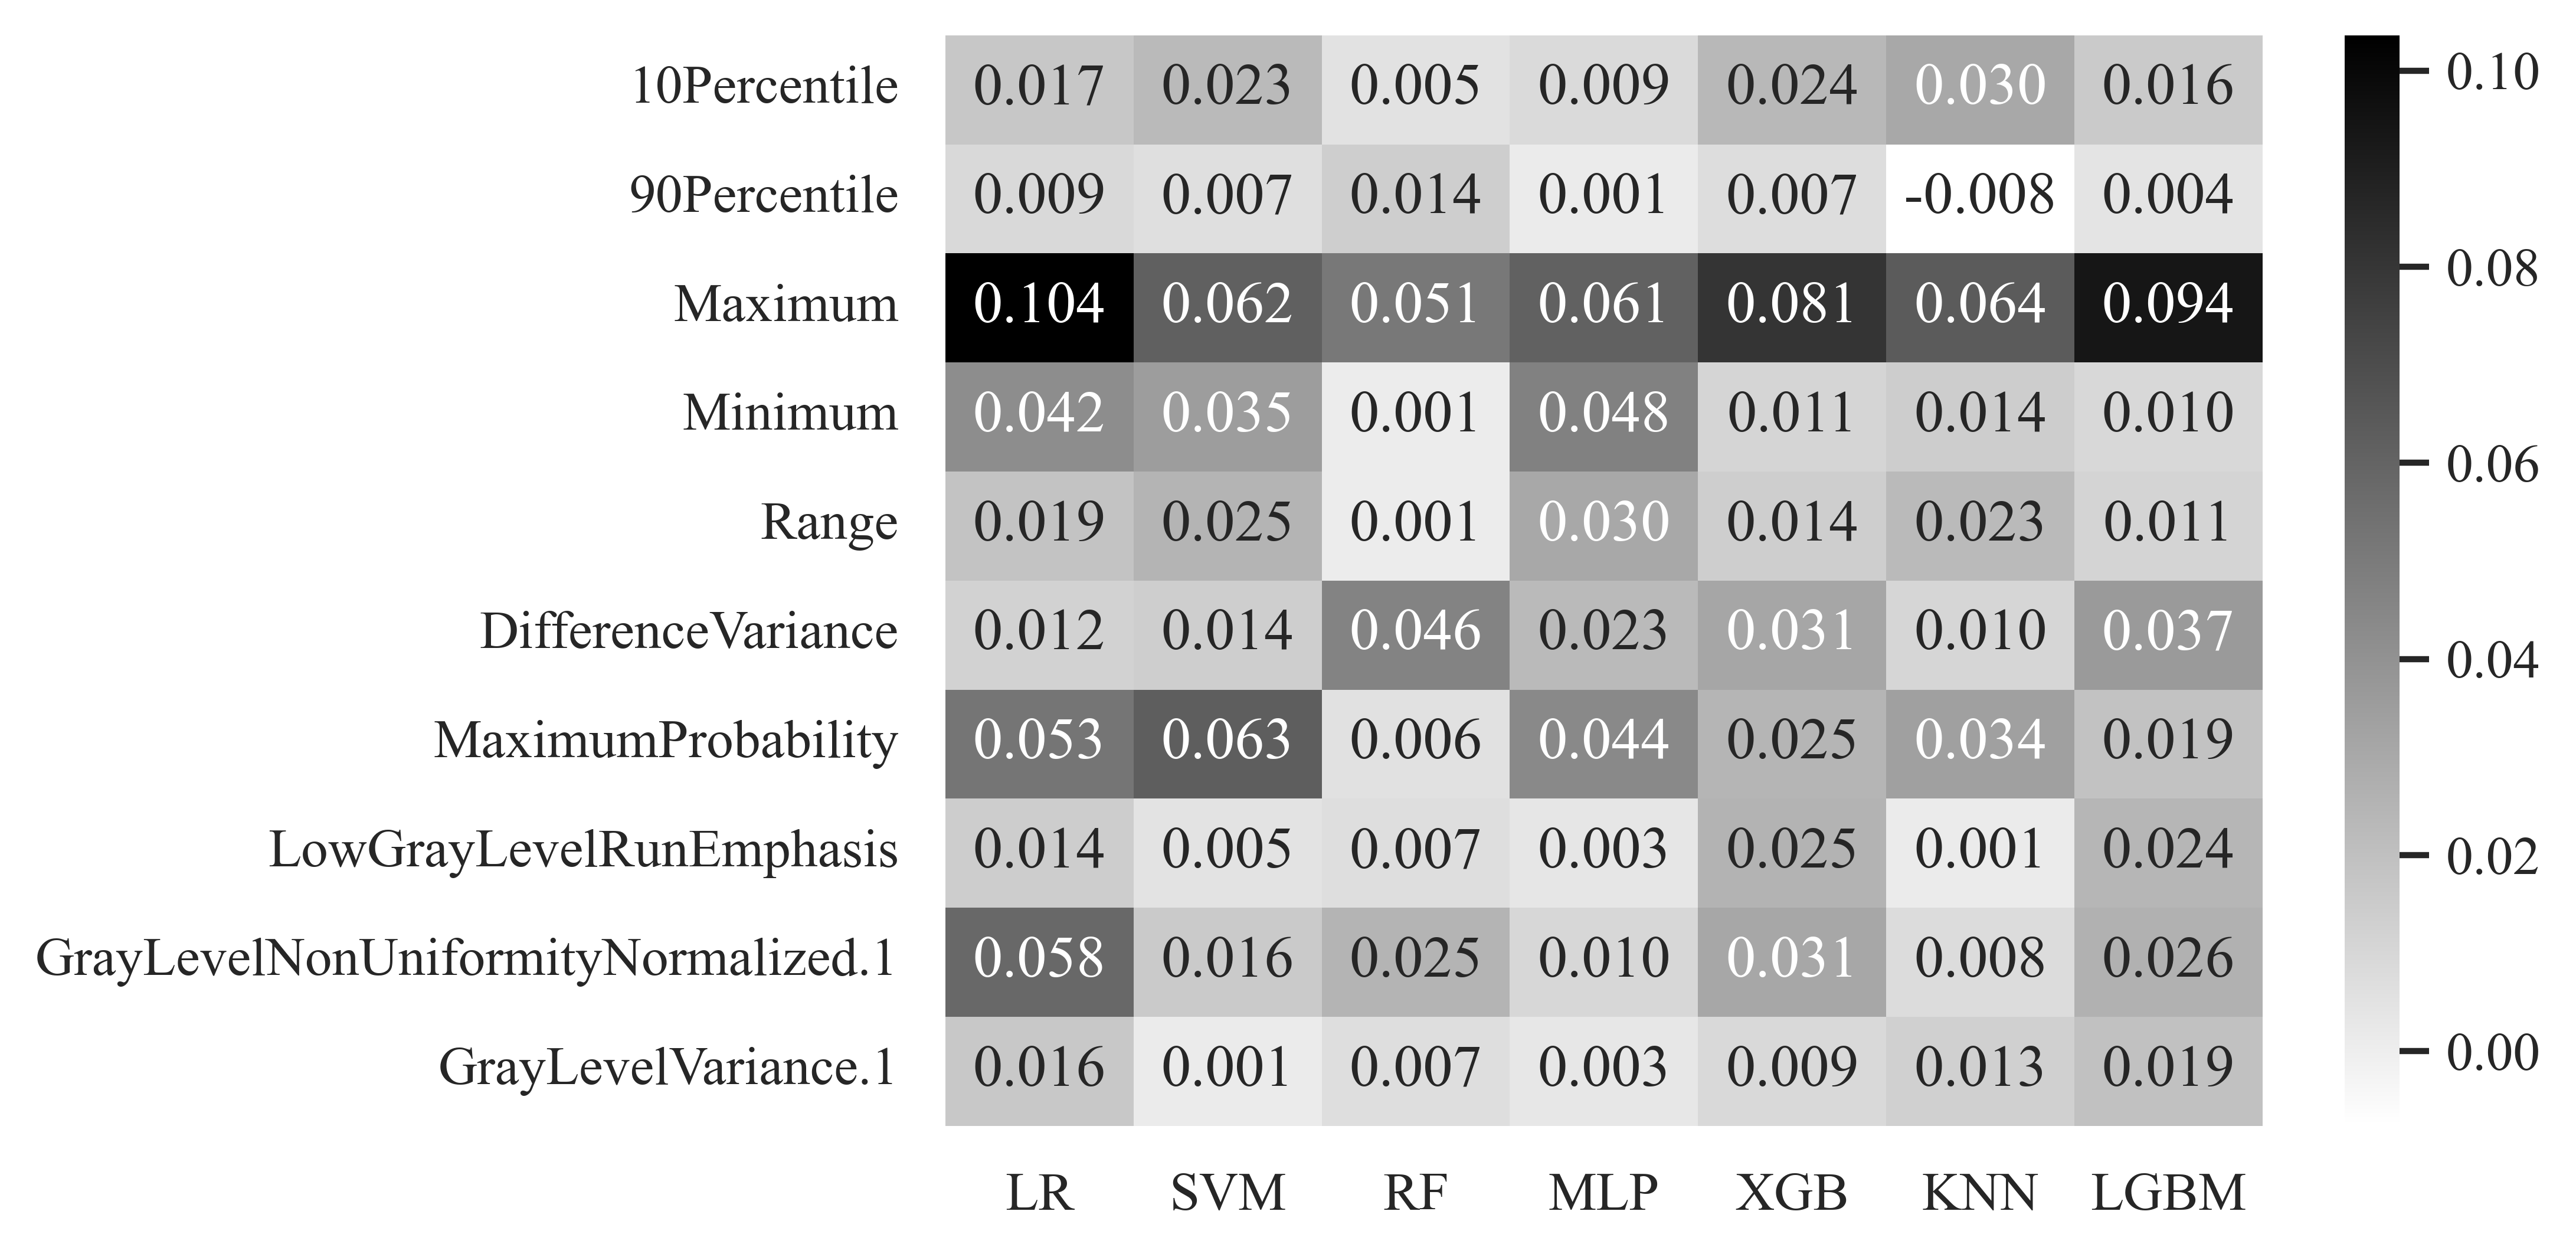

In [54]:
print(Importance)

# plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(figsize=(6, 4))
plt.rcParams['figure.dpi'] = 600
ax.set_aspect('auto')
sns.set(font_scale=1, font='Times New Roman')
sns.heatmap(Importance.iloc[:, [1, 2, 3, 4, 5, 6, 7]], cmap='binary',
            yticklabels=Importance.iloc[:, 0], annot=True, fmt='0.3f')
# plt.figure(figsize=(8, 6))
# plt.savefig('feature_heatmap.jpg', dpi=600)
plt.savefig('feature_heatmap.jpg', dpi=600, bbox_inches='tight', pad_inches=0.1)